In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA

In [56]:
seller_data = pd.read_csv('seller_data.csv')
seller_data

,id,A,B,C,D,E,F,performance
0,1,1,3,0,0,0,0.0,0.028890
1,2,3,0,0,0,0,0.0,0.968625
2,3,2,5,0,0,0,0.0,0.224752
3,4,1,3,0,0,0,0.0,0.058104
4,5,2,3,0,0,0,0.0,0.866307
...,...,...,...,...,...,...,...,...
1872,1873,1,3,0,0,0,0.0,0.000501
1873,1874,2,4,0,0,0,0.0,0.213830
1874,1875,1,3,0,0,0,0.0,0.186708
1875,1876,2,3,0,0,0,0.0,0.789114


In [57]:
seller_data.shape

(1877, 8)

In [58]:
# check null value
seller_data.isnull().sum()

id             0
A              0
B              0
C              0
D              0
E              0
F              0
performance    0
dtype: int64

In [59]:
seller_data = seller_data.drop(['id'], axis = 1)
seller_data

,A,B,C,D,E,F,performance
0,1,3,0,0,0,0.0,0.028890
1,3,0,0,0,0,0.0,0.968625
2,2,5,0,0,0,0.0,0.224752
3,1,3,0,0,0,0.0,0.058104
4,2,3,0,0,0,0.0,0.866307
...,...,...,...,...,...,...,...
1872,1,3,0,0,0,0.0,0.000501
1873,2,4,0,0,0,0.0,0.213830
1874,1,3,0,0,0,0.0,0.186708
1875,2,3,0,0,0,0.0,0.789114


In [82]:
column = seller_data.columns.values.tolist()
for i in column:
    print('Max value in column {}:'.format(i), seller_data['{}'.format(i)].max())
    print('Min value in column {}:'.format(i), seller_data['{}'.format(i)].min())
    print('---')

Max value in column A: 198
Min value in column A: 1
---
Max value in column B: 1097
Min value in column B: 0
---
Max value in column C: 16
Min value in column C: 0
---
Max value in column D: 8
Min value in column D: 0
---
Max value in column E: 100
Min value in column E: 0
---
Max value in column F: 3.0
Min value in column F: 0.0
---
Max value in column performance: 0.999981137
Min value in column performance: 7.63484e-05
---


In [61]:
feature = seller_data.columns.values.tolist()[:6]
feature

['A', 'B', 'C', 'D', 'E', 'F']

Relationship between 1 feature and performance

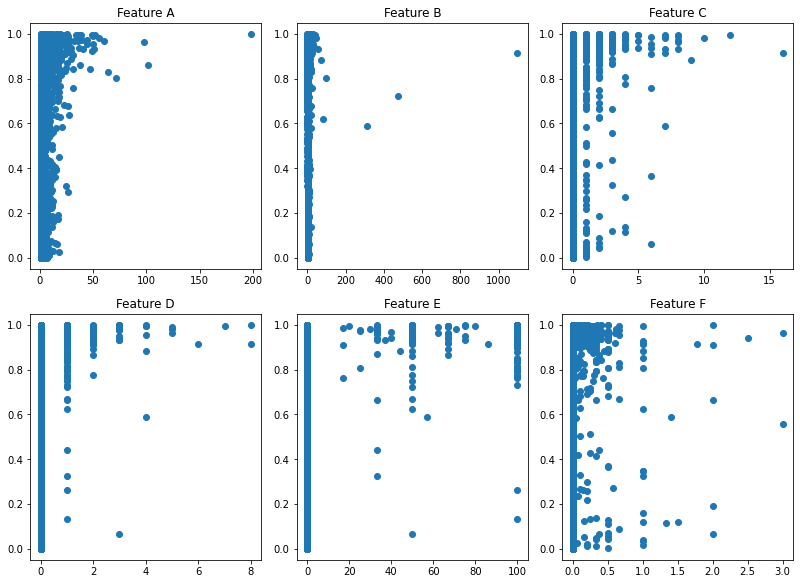

In [62]:
figure, axis = plt.subplots(2, 3, constrained_layout = True)
figure.set_figheight(8)
figure.set_figwidth(11)
axis = axis.ravel()

for i in range(len(feature)):
    axis[i].scatter(seller_data['{}'.format(seller_data.columns[i])], seller_data['performance'])
    axis[i].set_title("Feature {}".format(seller_data.columns[i]))

plt.show();

Correlation of all columns 

In [63]:
corr = seller_data.corr()
corr

,A,B,C,D,E,F,performance
A,1.000000,0.101392,0.397433,0.358932,0.326743,0.027644,0.264882
B,0.101392,1.000000,0.412283,0.366325,0.101195,0.232331,0.045213
C,0.397433,0.412283,1.000000,0.809446,0.498520,0.541323,0.229832
D,0.358932,0.366325,0.809446,1.000000,0.732668,0.374293,0.248905
E,0.326743,0.101195,0.498520,0.732668,1.000000,0.320964,0.290595
F,0.027644,0.232331,0.541323,0.374293,0.320964,1.000000,0.095551
performance,0.264882,0.045213,0.229832,0.248905,0.290595,0.095551,1.000000


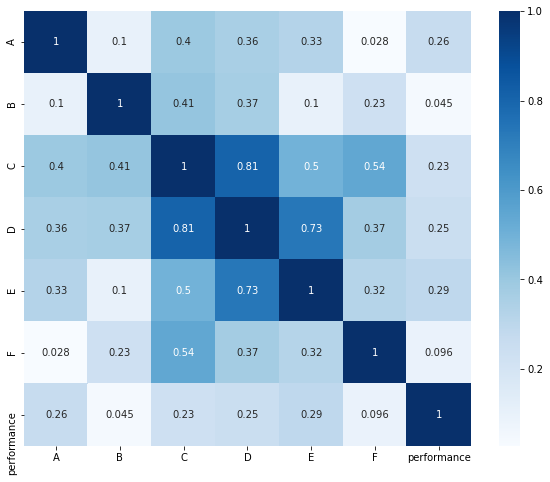

In [64]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, cmap = plt.cm.Blues);

Training set

In [65]:
X = seller_data[['A','B','C','D','E','F']]
Y = seller_data['performance']

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale

array([[-0.49019918, -0.07116648, -0.31317789, -0.25621844, -0.30492193,
        -0.25933979],
       [-0.26509732, -0.17541686, -0.31317789, -0.25621844, -0.30492193,
        -0.25933979],
       [-0.37764825, -0.00166623, -0.31317789, -0.25621844, -0.30492193,
        -0.25933979],
       ...,
       [-0.49019918, -0.07116648, -0.31317789, -0.25621844, -0.30492193,
        -0.25933979],
       [-0.37764825, -0.07116648, -0.31317789, -0.25621844, -0.30492193,
        -0.25933979],
       [-0.49019918, -0.07116648, -0.31317789, -0.25621844, -0.30492193,
        -0.25933979]])

Multi Linear Regression

In [66]:
lr = LinearRegression()
model = lr.fit(X, Y)

In [67]:
print('R-square:', model.score(X, Y))
print('Coef:', model.coef_)
print('intercept:', model.intercept_) # y value when independent variable = 0

R-square: 0.12013378754483583
Coef: [ 0.00672373 -0.00019483  0.03507528 -0.03218058  0.00338647 -0.02916983]
intercept: 0.5141551059468394


A : 0.006723733230555689
B : -0.00019482872871483712
C : 0.035075277306592614
D : -0.03218057728176585
E : 0.003386467053931028
F : -0.02916982941573596


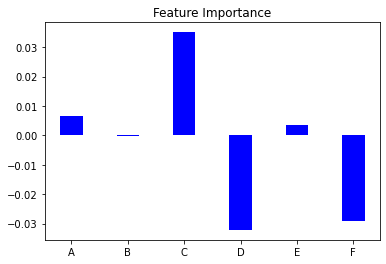

In [68]:
importance = model.coef_
for i,v in zip(feature, importance):
    print(i,':', v)
    
plt.bar(feature, importance, color = 'blue', width = 0.4)
plt.title('Feature Importance')
plt.show();

Decision Tree Regression

In [69]:
dtr = DecisionTreeRegressor()
model1 = dtr.fit(X, Y)

In [70]:
print('R-square:', model1.score(X, Y))

R-square: 0.34648728116999084


A : 0.35789202166354706
B : 0.29257425737052817
C : 0.015403021261416548
D : 0.2726894760376985
E : 0.0006205473160783463
F : 0.06082067635073144


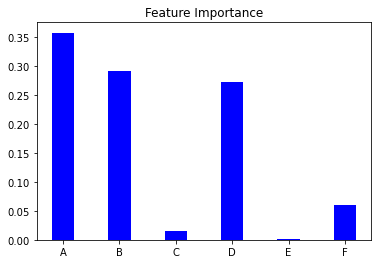

In [71]:
importance = model1.feature_importances_
for i,v in zip(feature, importance):
    print(i,':', v)

plt.bar(feature, importance, color = 'blue', width = 0.4)
plt.title('Feature Importance')
plt.show();

Random Forest Regression

In [72]:
rfr = RandomForestRegressor()
model2 = rfr.fit(X, Y)

In [73]:
print('R-square:', model2.score(X, Y))

R-square: 0.3382807628544221


A : 0.4069129851759446
B : 0.3300629818700095
C : 0.02514692497736023
D : 0.09171235580836594
E : 0.08472403587104024
F : 0.06144071629727945


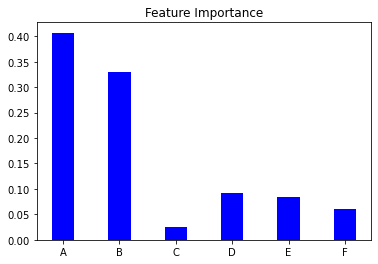

In [74]:
importance = model2.feature_importances_
for i,v in zip(feature, importance):
    print(i,':', v)

plt.bar(feature, importance, color = 'blue', width = 0.4)
plt.title('Feature Importance')
plt.show();

XGB Regression

In [75]:
xgbr = XGBRegressor()
model3 = xgbr.fit(X, Y)

In [76]:
print('R-square:', model3.score(X, Y))

R-square: 0.3454319641348208


A : 0.18533805
B : 0.16115832
C : 0.042457245
D : 0.541499
E : 0.017473733
F : 0.052073665


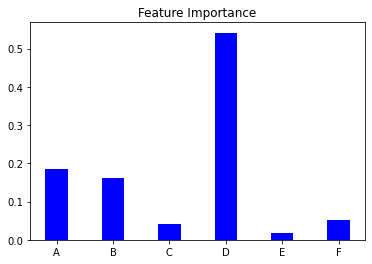

In [77]:
importance = model3.feature_importances_
for i,v in zip(feature, importance):
    print(i,':', v)

plt.bar(feature, importance, color = 'blue', width = 0.4)
plt.title('Feature Importance')
plt.show();

KNeighbors Regression

In [78]:
knr = KNeighborsRegressor()
model4 = knr.fit(X_scale, Y)

In [79]:
print('R-square:', model4.score(X_scale, Y))

R-square: 0.18705466203824395


A : 0.027767505183419215
B : 0.03658887074781525
C : 0.005788739921322233
D : 0.0034903288903101125
E : 0.008613242062697804
F : 0.0041728980788295015


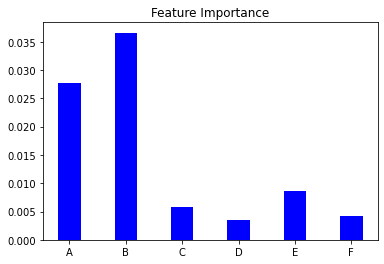

In [80]:
results = permutation_importance(model4, X_scale, Y, scoring='neg_mean_squared_error')
importance = results.importances_mean

for i,v in zip(feature, importance):
    print(i,':', v)

plt.bar(feature, importance, color = 'blue', width = 0.4)
plt.title('Feature Importance')
plt.show();